# Simple Linear Regression SAT GPA

## 1. Import the relevant libraries

In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
# We can override the default matplotlib styles with those of Seaborn
import seaborn as sns
sns.set()

### ignore warnings
import warnings
warnings.filterwarnings('ignore')

### set pandas format for decimal places. In this case, 2 places
pd.options.display.float_format = '{:,.2f}'.format

## 2. Load the data

In [34]:
# Load the data from a .csv in the same folder
data = pd.read_csv('simple_linear_regression_SAT_GPA.csv')

Take a look at the data by run the data object variable (dataframe):

In [35]:
# Let's check what's inside this data frame
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83
...,...,...
79,1936,3.71
80,1810,3.71
81,1987,3.73
82,1962,3.76


## 3. Explore the Data: shape, info(), describe()

In [36]:
data.dtypes

SAT      int64
GPA    float64
dtype: object

In [37]:
data.shape

(84, 2)

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   SAT     84 non-null     int64  
 1   GPA     84 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 1.4 KB


In [ ]:
# This method gives us very nice descriptive statistics. We don't need this as of now, but will later on!
data.describe()

In [ ]:
### plot the data using seaborn's pairplot method.
### paramers are: 1) data, 2) x_vars, and 3) y_vars
#### visualizing for correlation
sns.pairplot(data, x_vars=['SAT'], 
             y_vars='GPA')
plt.show()

## 4. Create your first regression

### 4.1 Define the dependent and the independent variables

In [39]:
# Following the regression equation, our dependent variable (y) is the GPA
y = data ['GPA']
# Similarly, our independent variable (x) is the SAT score
x1 = data ['SAT']

### 4.2 Explore the data

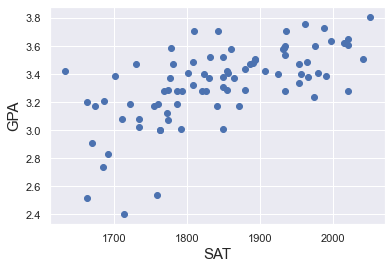

In [40]:
# Plot a scatter plot (first we put the horizontal axis, then the vertical axis)
plt.scatter(x1, y)

# Name the labels for x axis and y axis
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)

# Show the plot
plt.show()

## 5. Regression itself

In [41]:
# Add a constant. Essentially, we are adding a new column (equal in lenght to x), which consists only of 1s
x = sm.add_constant(x1)
# Fit the model, according to the OLS (ordinary least squares) method with a dependent variable y 
# and an independent x
results = sm.OLS(y,x).fit()
# Print a nice summary of the regression. That's one of the strong points of statsmodels -> the summaries
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Wed, 13 Apr 2022   Prob (F-statistic):           7.20e-11
Time:                        15:29:26   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### 5.2 Plotting the model 

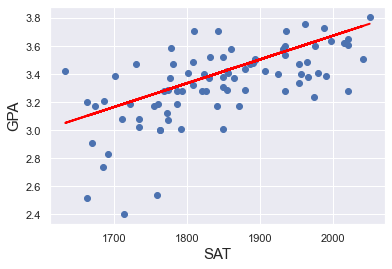

In [42]:
# Create a scatter plot
plt.scatter(x1,y)
# Define the regression equation, so we can plot it later
yhat = 0.0017*x1 + 0.275
# Plot the regression line against the independent variable (SAT)
fig = plt.plot(x1, yhat, lw=2, c='red', label ='regression line')
# Label the axes
plt.xlabel('SAT', fontsize = 15)
plt.ylabel('GPA', fontsize = 15)
plt.show()

### 5.3 Apply the Model

In [43]:
### A student with a 2000 SAT would get a GPA of ???
2000 * 0.0017 + 0.275

3.675

In [44]:
2350 * 0.0017 + .275

4.27